In [1]:
#Import necessary libraries and model 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

import sweetviz as sv
import seaborn as sn
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula as smf

import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [6]:
data=pd.read_csv("delivery_time.csv")

In [7]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Performing EDA on Dataset

In [6]:
data.shape

(21, 2)

In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


From above information we can see that there is no null values in data set.
so we Find Duplicates in data

In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data.duplicated().sum()

0

In [11]:
data[data.duplicated()]

,Delivery Time,Sorting Time


No duplicates value in dataset

## Plotting the data for checking outliers¶

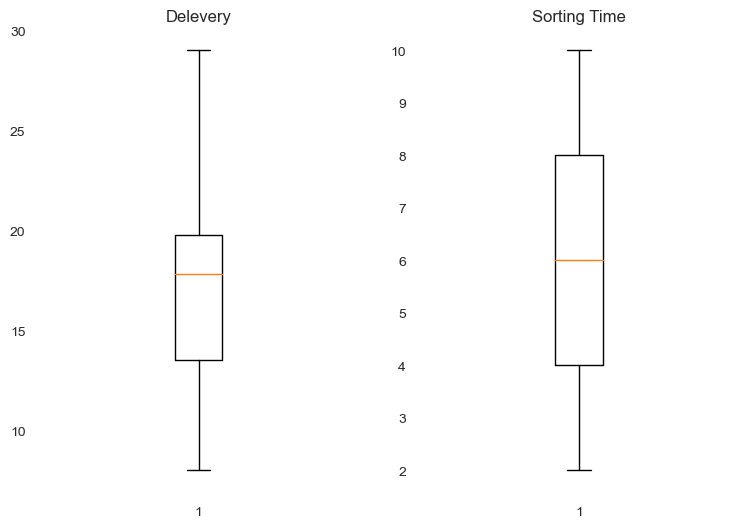

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delevery')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [13]:
data.corr()


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Visualization of Correlation beteen x and y
## regplot = regression plot

In [18]:
#Extracting the independent(x) and dependent variables(y)
x=data["Delivery Time"].values
y=data["Sorting Time"].values

print(x)
print(y)

[21.   13.5  19.75 24.   29.   15.35 19.    9.5  17.9  18.75 19.83 10.75
 16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 21.5 ]
[10  4  6  9 10  6  7  3 10  9  8  4  7  3  3  4  6  7  2  7  5]


<AxesSubplot:>

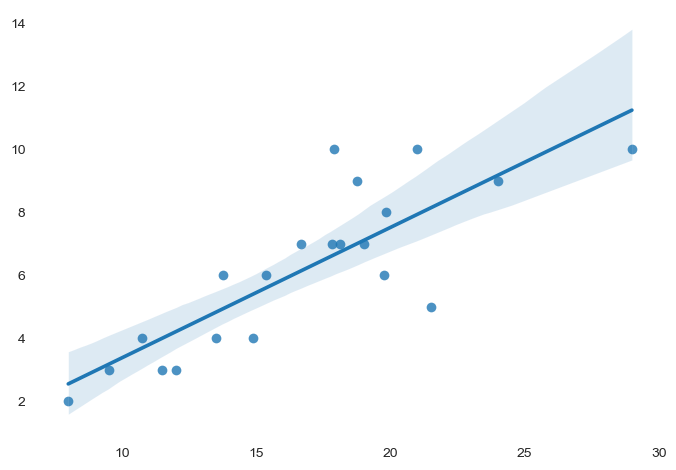

In [57]:
sn.regplot(x,y)

As you can see above
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

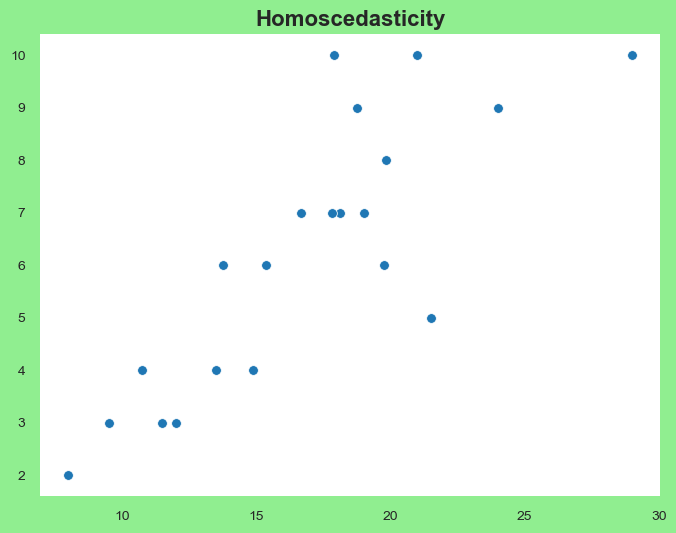

In [21]:
#Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sn.scatterplot(x, y)
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [22]:
data.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

## Feature Engineering
#### Trying different transformation of data to estimate normal distribution and remove any skewness

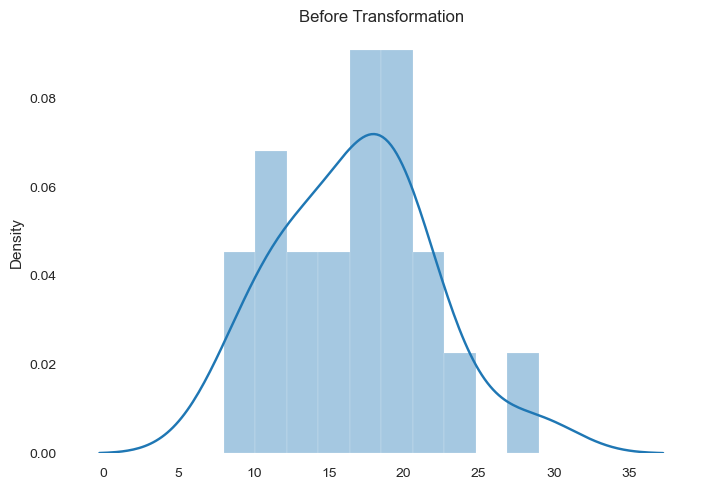

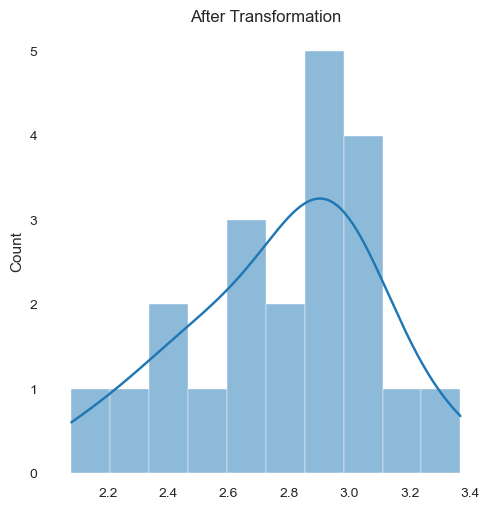

In [29]:
sn.distplot(x, bins = 10, kde = True)
plt.title('Before Transformation')

sn.displot(np.log(x), bins = 10, kde = True)
plt.title('After Transformation')

plt.show()

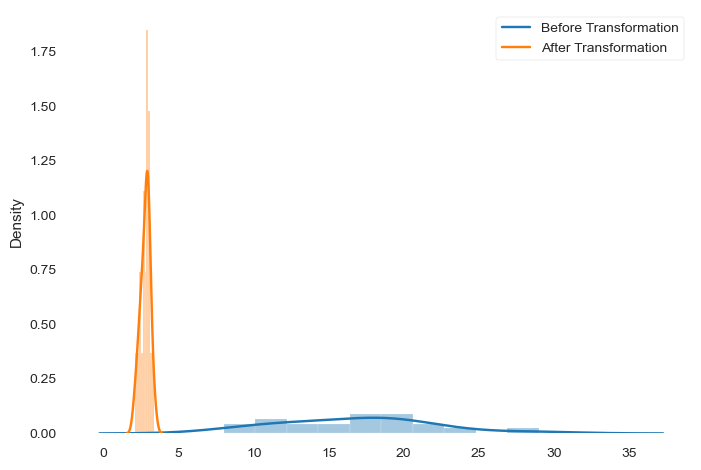

In [30]:
labels = ['Before Transformation','After Transformation']
sn.distplot(x, bins = 10, kde = True)
sn.distplot(np.log(x), bins = 10, kde = True)
plt.legend(labels)
plt.show()

## As you can see
#### How log transformation affects the data and it scales the values down.
#### Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

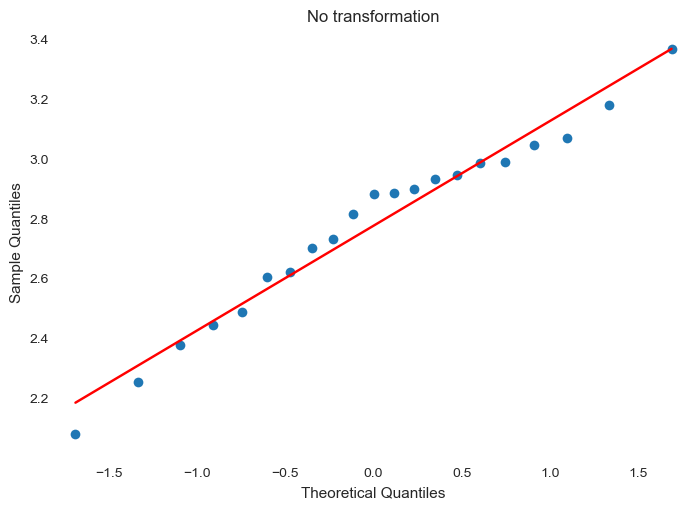

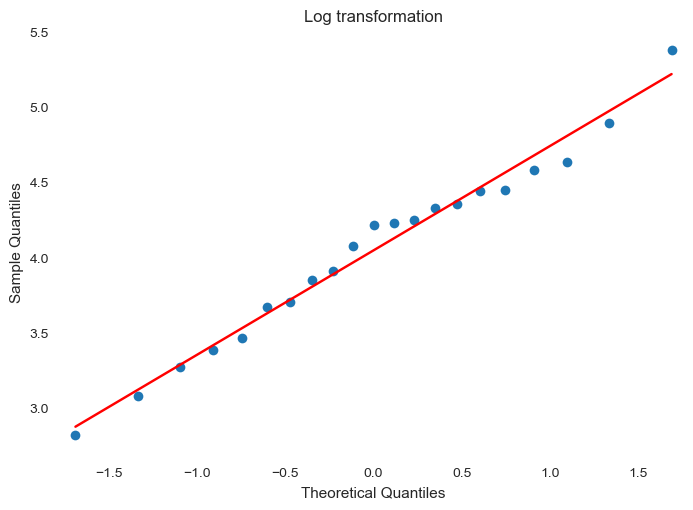

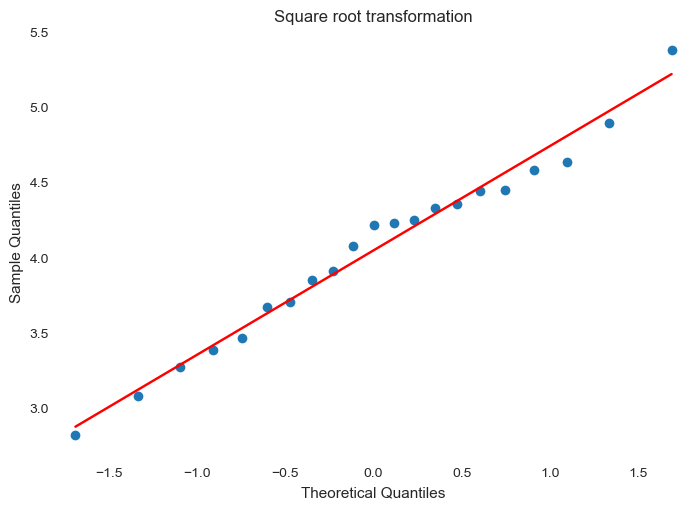

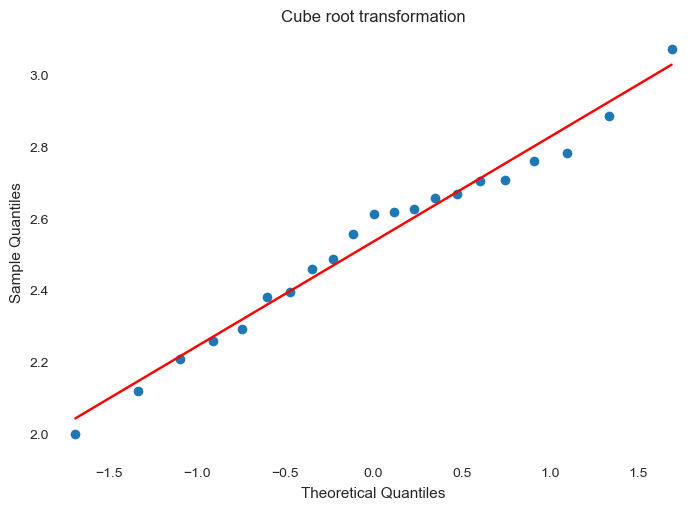

In [33]:
sm.qqplot(np.log(x), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(x), line = 'r')
plt.title('Log transformation')

sm.qqplot(np.sqrt(x), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(x), line = 'r')
plt.title('Cube root transformation')

plt.show()

# Same fo Sorting Time

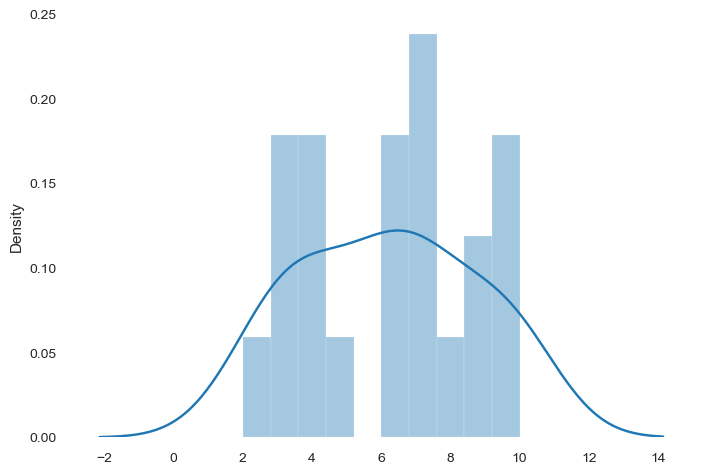

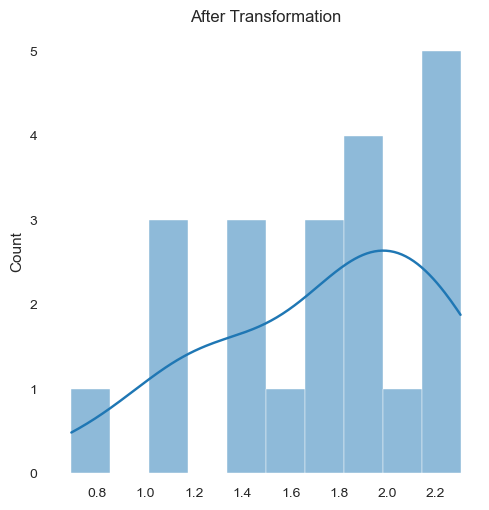

In [35]:
labels = ['Before Transformation','After Transformation']
sn.distplot(y, bins = 10, kde = True)
sn.displot(np.log(y), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

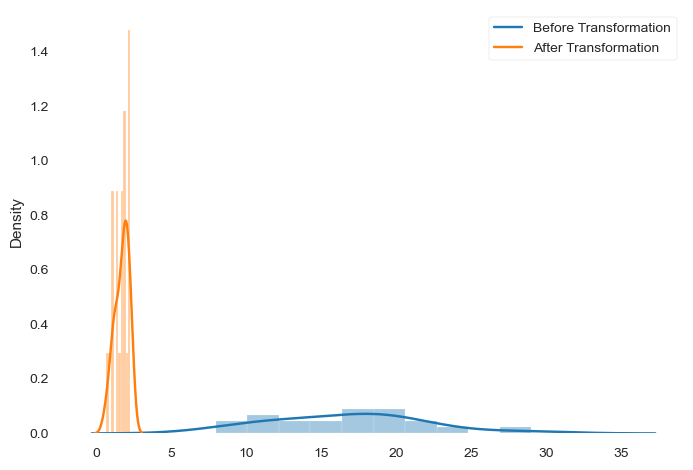

In [36]:
labels = ['Before Transformation','After Transformation']
sn.distplot(x, bins = 10, kde = True)
sn.distplot(np.log(y), bins = 10, kde = True)
plt.legend(labels)
plt.show()

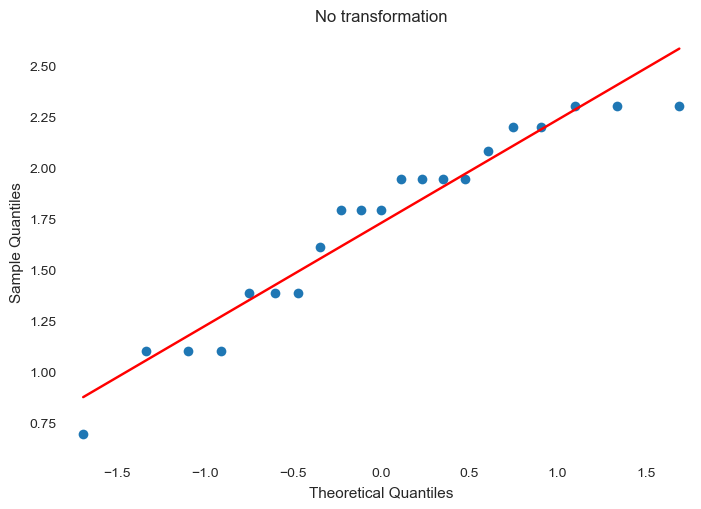

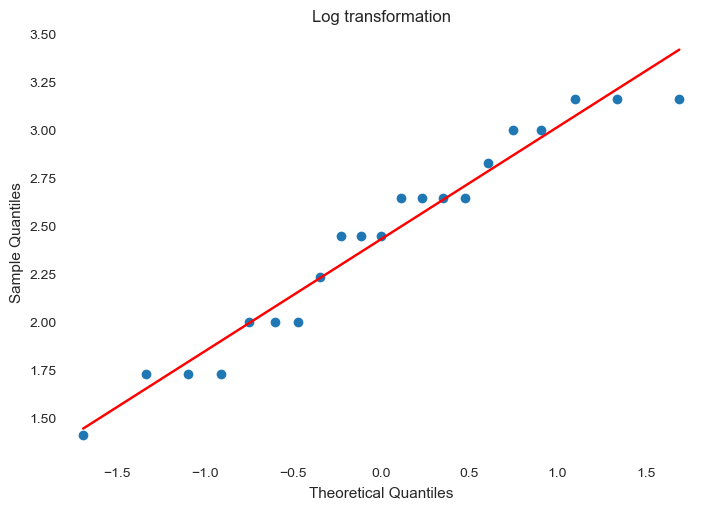

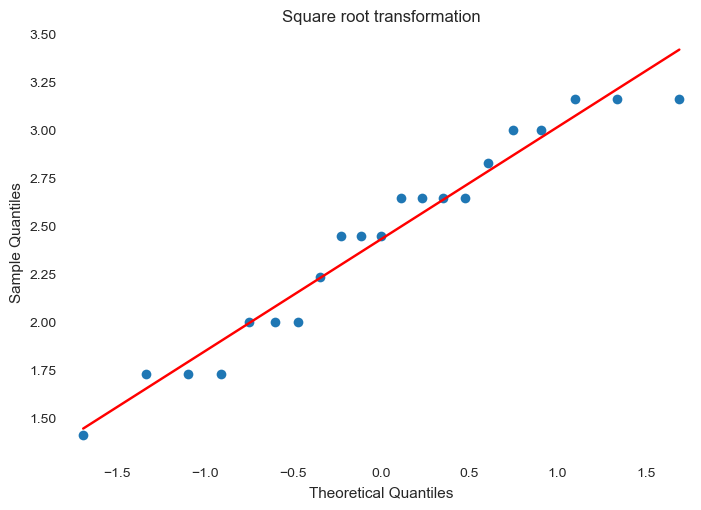

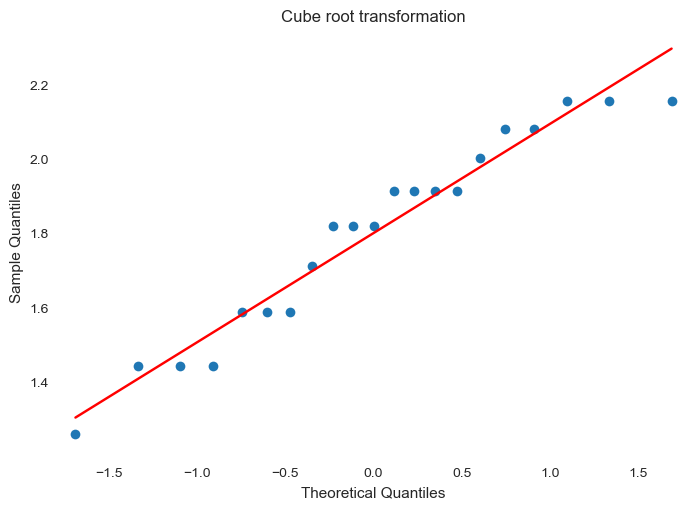

In [37]:
sm.qqplot(np.log(y), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(y), line = 'r')
plt.title('Log transformation')

sm.qqplot(np.sqrt(y), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(y), line = 'r')
plt.title('Cube root transformation')

plt.show()

# Fitting a Linear Regression Model
### Using Ordinary least squares (OLS) regression

##### It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [58]:
#Using statmodel
model = sm.OLS(y,x).fit()
print(model)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                    6.12e-15
Time:                        14:20:36   Log-Likelihood:                         -37.082
No. Observations:                  21   AIC:                                      76.16
Df Residuals:                      20   BIC:                                      77.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3723      0.018     20.603      0.000       0.335       0.410
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.597
Skew:                           0.399   Prob(JB):                        0.742
Kurtosis:                       3.217   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As you can notice in the above model
##### The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
##### F-statitics is quite high as well and yes desire it to be higher
##### But log-likelihood is quite very low far away from 0
##### and AIC and BIC score are much higher for this model
#### Lets Try some data transformation to check whether these scores can get any better than this.

In [46]:
#Sqare root transformation on data
x1=np.sqrt(x)
y1=np.sqrt(y)
    
    
model1 = sm.OLS(y1,x1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                    2.10e-20
Time:                        13:59:23   Log-Likelihood:                         -3.1813
No. Observations:                  21   AIC:                                      8.363
Df Residuals:                      20   BIC:                                      9.407
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6033      0.015     39.267      0.000       0.571       0.635
==============================================================================
Omnibus:                        0.178   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.257
Skew:                           0.184   Prob(JB):                        0.880
Kurtosis:                       2.602   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Cube root transformation on data
x2=np.cbrt(x)
y2=np.cbrt(y)
    
    
model2 = sm.OLS(y2,x2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3370.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                    9.01e-24
Time:                        14:01:31   Log-Likelihood:                          11.542
No. Observations:                  21   AIC:                                     -21.08
Df Residuals:                      20   BIC:                                     -20.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7115      0.012     58.056      0.000       0.686       0.737
==============================================================================
Omnibus:                        0.130   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.339
Skew:                           0.102   Prob(JB):                        0.844
Kurtosis:                       2.412   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#log transformation on data
x3=np.log(x)
y3=np.log(y)
    
    
model3 = sm.OLS(y3,x3).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                    5.72e-17
Time:                        14:08:46   Log-Likelihood:                         -4.5371
No. Observations:                  21   AIC:                                      11.07
Df Residuals:                      20   BIC:                                      12.12
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6312      0.024     26.244      0.000       0.581       0.681
==============================================================================
Omnibus:                        1.642   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.154
Skew:                          -0.316   Prob(JB):                        0.562
Kurtosis:                       2.041   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Intercept
model.params

array([0.37228605])

In [54]:
print(model.tvalues,'\n',model.pvalues)


[20.60334431] 
 [6.11890805e-15]


In [59]:
model.rsquared,model.rsquared_adj


(0.955005401256664, 0.9527556713194972)

In [61]:
model1_pred_y =np.square(model1.predict(x))
model2_pred_y =pow(model2.predict(x),3)
model3_pred_y =np.exp(model3.predict(x))

In [79]:
model.predict(15)

array([5.58429079])

In [80]:
model1.predict(15)

array([9.04934343])

In [81]:
model2.predict(15)

array([10.67262602])

In [82]:
model3.predict(15)

array([9.46800625])

In [62]:
model1_rmse =np.sqrt(mean_squared_error(y, model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(y, model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(y, model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 1.4495681292418754 
model1= 122.5989683586028 
model2= 2879.6143845641045 
model3= 19453341.519793972


In [93]:
model.predict(15)

array([5.58429079])